In [2]:
import pandas as pd # pandas k nacitani dat z excelu
import numpy as np # numpy pro vypocty
import matplotlib.pyplot as plt # vykreslovani grafu
from scipy import optimize # fitovani
from decimal import Decimal # zaokrouhlovani na jesnu platnou cifru

In [3]:
# ======================== ZAOKROUHLOVANI NA JEDNU PLATNOU CIFRU =======================
def remove(n): # pomocna funkce pro round_to_reference co uz uprimne nevim co dela
    if Decimal(n) == Decimal(n).to_integral():
        return int(n) 
    else: return n

def round_to_reference(x, y):
    """Zaokrouhleni vstupnich hodnot x a y na jednu platnou cifru podle y
    Args:
        x (float): hodnota k zaokrouhleni (namerena data)
        y (float): chyba mereni

    Returns:
        (float, float): hodnoty x a y zaokrouhlede na jednu platnou cifru podle y
    """
    pozice_platne_cifry = -int(np.floor(np.log10(y)))
    return remove(round(x, pozice_platne_cifry)), \
        remove(round(y, pozice_platne_cifry))

In [4]:
def linear_fit(x, a, b): 
    """Lineárni funkce y = a*x + b
    Args:
        x (int / float): bod vycislovani (namerena hodnota)
        a (int / float): koeficient
        b (int / float): konstanta
    Returns:
        float: hodnota linearni funkce s predpisem y = a*x + b v bode x
    """
    return a*x + b

def log10_fit(x, a, b): 
    """Logaritmická funkce y = a*log(x) + b
    Args:
        x (int / float): bod vycislovani (namerena hodnota)
        a (int / float): koeficient
        b (int / float): konstanta
    Returns:
        float: hodnota logaritmicke funkce s predpisem y = a*log(x) + b v bode x
    """
    return a*np.log10(x) + b

Statická charakteristika v uzavřené smyčce

linearni fit: y = (-11.9\pm 0.9)x +         (-6.6\pm 0.7)
linearni fit: y = (-10.9\pm 0.9)x +         (6\pm 0.6)


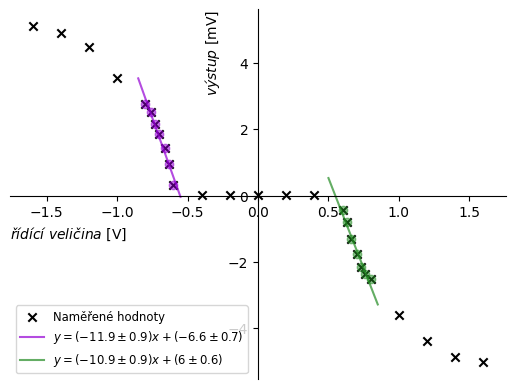

In [5]:
staticka = pd.read_excel("rsen_laborka.xlsx", sheet_name="Staticka", engine="openpyxl", nrows=28)

fitovane_parametry_staticka_1, kovariance_parametru_staticka_1 = optimize.curve_fit(linear_fit, 
                                                                      xdata=staticka["ridici_velicina [V]"][4:11], 
                                                                      ydata=staticka["vystup [mV]"][4:11], 
                                                                      p0 = [-11, -6]) # ocekavane parametry

sigma_parametru_staticka_1 = np.sqrt(np.diag(kovariance_parametru_staticka_1)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_staticka_1 = []
for j in range(len(fitovane_parametry_staticka_1)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_staticka_1.append(round_to_reference(fitovane_parametry_staticka_1[j], 
                                                         sigma_parametru_staticka_1[j]))
print(
    f"linearni fit: y = ({zaokrouhlene_parametry_staticka_1[0][0]}\\pm {zaokrouhlene_parametry_staticka_1[0][1]})x + \
        ({zaokrouhlene_parametry_staticka_1[1][0]}\\pm {zaokrouhlene_parametry_staticka_1[1][1]})")

fitovane_parametry_staticka_2, kovariance_parametru_staticka_2 = optimize.curve_fit(linear_fit, 
                                                                      xdata=staticka["ridici_velicina [V]"][16:23], 
                                                                      ydata=staticka["vystup [mV]"][16:23], 
                                                                      p0 = [-11, 5]) # ocekavane parametry

sigma_parametru_staticka_2 = np.sqrt(np.diag(kovariance_parametru_staticka_2)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_staticka_2 = []
for j in range(len(fitovane_parametry_staticka_2)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_staticka_2.append(round_to_reference(fitovane_parametry_staticka_2[j], 
                                                         sigma_parametru_staticka_2[j]))
print(
    f"linearni fit: y = ({zaokrouhlene_parametry_staticka_2[0][0]}\\pm {zaokrouhlene_parametry_staticka_2[0][1]})x + \
        ({zaokrouhlene_parametry_staticka_2[1][0]}\\pm {zaokrouhlene_parametry_staticka_2[1][1]})")

osa_x1 = np.arange(-0.85, -0.5, 0.05) # navzorkovani hodnot na ose x, aby se data dala prolozit krivkou
osa_x2 = np.arange(0.5, 0.9, 0.05) # navzorkovani hodnot na ose x, aby se data dala prolozit krivkou

fig_staticka, ax = plt.subplots()
ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
plt.scatter(x=staticka["ridici_velicina [V]"], y=staticka["vystup [mV]"], # namerena data (list / pd.DataFrame, numpy.NDArray / ...)
             marker='x', color="black", # kosmeticke upravy
             label = "Naměřené hodnoty" )
plt.scatter(x=staticka["ridici_velicina [V]"][4:11], y=staticka["vystup [mV]"][4:11], # namerena data (list / pd.DataFrame, numpy.NDArray / ...)
             marker='o', color="darkviolet", alpha=0.5 # kosmeticke upravy
             )
plt.scatter(x=staticka["ridici_velicina [V]"][16:23], y=staticka["vystup [mV]"][16:23], # namerena data (list / pd.DataFrame, numpy.NDArray / ...)
             marker='o', color="forestgreen", alpha=0.5 # kosmeticke upravy
             )

plt.plot(osa_x1, linear_fit(osa_x1, fitovane_parametry_staticka_1[0], fitovane_parametry_staticka_1[1]), 
         color = 'darkviolet', alpha=0.7,
         label = "$y=(-11.9\\pm 0.9)x+(-6.6\\pm 0.7)$")
plt.plot(osa_x2, linear_fit(osa_x2, fitovane_parametry_staticka_2[0], fitovane_parametry_staticka_2[1]), 
         color = 'forestgreen', alpha=0.7,
         label = "$y=(-10.9\\pm 0.9)x+(6\\pm 0.6)$")
plt.legend(loc="lower left", fontsize="small")
ax.set_xlabel('$řídící~veličina~\\mathrm{[V]}$ ', fontsize = 10, loc="left")
ax.set_ylabel("$výstup~\\mathrm{[mV]}$", fontsize = 10, loc="top")
plt.savefig("../img/graf_staticka.pdf")
plt.show(block=True)

Přechodová charakteristika

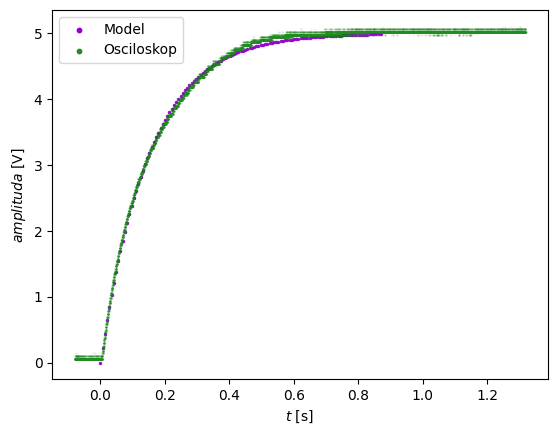

In [6]:
prechodova_model = pd.read_excel("rsen_laborka.xlsx", sheet_name="Prechodova", engine="openpyxl", usecols="A, B", nrows=127, skiprows=[0])
prechodova_osciloskop = pd.read_excel("rsen_laborka.xlsx", sheet_name="Prechodova", engine="openpyxl", usecols="D, E", skiprows=[1])


fig_prechodova = plt.figure()
plt.scatter(x=prechodova_model["cas"], y=prechodova_model["amplituda"],
             marker='.', color="darkviolet", alpha=0.9, s=9, # kosmeticke upravy
            label = "Model")
plt.scatter(x=prechodova_osciloskop["Unnamed: 4"], y=prechodova_osciloskop["Unnamed: 3"],
             marker='.', color="forestgreen", alpha=0.1, s=1, # kosmeticke upravy
            label = "Osciloskop")

lgnd = plt.legend(scatterpoints=1, fontsize=10)
for handle in lgnd.legend_handles:
    handle.set_sizes([40])
    handle.set_alpha(1)
plt.xlabel('$t~\\mathrm{[s]}$ ', fontsize = 10)
plt.ylabel("$amplituda~\\mathrm{[V]}$", fontsize = 10)
plt.savefig("../img/graf_prechodova.pdf")
plt.show(block=True)


Frekvenční charakteristika v otevřené smyčce

amplitudova: A=(-20.5\pm 0.6)\log(f)+(-8\pm 0.2)
fazova: A=(-100\pm 10)\log(\varphi)+(-85\pm 7)


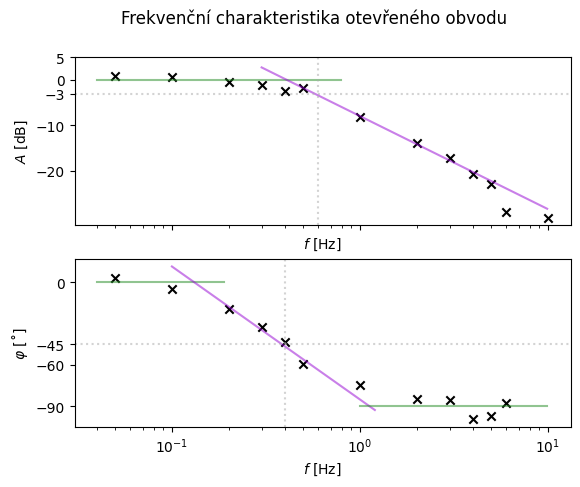

In [17]:
amplitudova_otevrena = pd.read_excel("rsen_laborka.xlsx", sheet_name="Frekvencni", engine="openpyxl", nrows=14, usecols="A, E")
fazova_otevrena = pd.read_excel("rsen_laborka.xlsx", sheet_name="Frekvencni", engine="openpyxl", nrows=12, usecols="A, C")

#print(fazova_otevrena)

fitovane_parametry_amplitudova_otevrena, kovariance_parametru_amplitudova_otevrena = optimize.curve_fit(log10_fit, 
                                                                      xdata=amplitudova_otevrena["frekvence"][5:10], 
                                                                      ydata=amplitudova_otevrena["amplituda [dB]"][5:10]-4, 
                                                                      p0 = [-10, 5]) # ocekavane parametry

sigma_parametru_amplitudova_otevrena = np.sqrt(np.diag(kovariance_parametru_amplitudova_otevrena)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_amplitudova_otevrena = []
for j in range(len(fitovane_parametry_amplitudova_otevrena)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_amplitudova_otevrena.append(round_to_reference(fitovane_parametry_amplitudova_otevrena[j], 
                                                         sigma_parametru_amplitudova_otevrena[j]))
print(
    f"amplitudova: A=({zaokrouhlene_parametry_amplitudova_otevrena[0][0]}\\pm {zaokrouhlene_parametry_amplitudova_otevrena[0][1]})\\log(f)+({zaokrouhlene_parametry_amplitudova_otevrena[1][0]}\\pm {zaokrouhlene_parametry_amplitudova_otevrena[1][1]})")

fitovane_parametry_fazova, kovariance_parametru_fazova = optimize.curve_fit(log10_fit, 
                                                                      xdata=fazova_otevrena["frekvence"][2:6], 
                                                                      ydata=fazova_otevrena["fazovy_posun [stupne]"][2:6], 
                                                                      p0 = [0, 5]) # ocekavane parametry

sigma_parametru_fazova = np.sqrt(np.diag(kovariance_parametru_fazova)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_fazova = []
for j in range(len(fitovane_parametry_fazova)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_fazova.append(round_to_reference(fitovane_parametry_fazova[j], 
                                                         sigma_parametru_fazova[j]))
print(
    f"fazova: A=({zaokrouhlene_parametry_fazova[0][0]}\\pm {zaokrouhlene_parametry_fazova[0][1]})\\log(\\varphi)+({zaokrouhlene_parametry_fazova[1][0]}\\pm {zaokrouhlene_parametry_fazova[1][1]})")


x_amplitudova_konst = np.arange(0.04, 0.8, 0.05)
x_amplitudova_zlom = np.arange(0.3, 10, 0.1)
x_fazova_konst1 = np.arange(0.04, 0.2, 0.05)
x_fazova_zlom = np.arange(0.1, 1.3, 0.1)
x_fazova_konst2 = np.arange(1, 10, 0.1)

fig, (ax1, ax2), = plt.subplots(2, sharex=True)
fig.suptitle("Frekvenční charakteristika otevřeného obvodu")
ax1.scatter(x=amplitudova_otevrena["frekvence"], y=amplitudova_otevrena["amplituda [dB]"]-4,
             marker='x', color="black", # kosmeticke upravy
            label = "Amplitudová charakteristika")
ax1.plot(x_amplitudova_konst, log10_fit(x_amplitudova_konst, 0, 0), 
         color = 'forestgreen', alpha = 0.5,
         label = "Konstantní průběh")

ax1.plot(x_amplitudova_zlom, log10_fit(x_amplitudova_zlom, fitovane_parametry_amplitudova_otevrena[0], fitovane_parametry_amplitudova_otevrena[1]), 
         color = 'darkviolet', alpha = 0.5, 
         label = "$A=(-20.5\\pm 0.6)\\log(f)+(-8.0\\pm 0.2)$")
ax1.axhline(y=-3, color='darkgray', alpha=0.5, ls="dotted")
ax1.axvline(x= 0.6, color='darkgray', alpha=0.5, ls="dotted")
ax1.set_xscale("log")
#plt.legend()
ax1.set_xlabel('$f~\\mathrm{[Hz]}$ ', fontsize = 10)
ax1.set_ylabel("$A~\\mathrm{[dB]}$", fontsize = 10)
ax1.set_yticks([5, 0, -3, -10, -20])
#plt.savefig("../img/graf_amplitudova_otevrena.pdf")
#plt.show(block=True)

#fig_fazova = plt.figure()
ax2.scatter(x=fazova_otevrena["frekvence"], y=fazova_otevrena["fazovy_posun [stupne]"],
             marker='x', color="black", # kosmeticke upravy
            label = "Fázová charakteristika")
ax2.plot(x_fazova_konst1, log10_fit(x_fazova_konst1, 0, 0), 
         color = 'forestgreen', alpha = 0.5,
         label = "Konstantní průběh")
ax2.plot(x_fazova_zlom, log10_fit(x_fazova_zlom, fitovane_parametry_fazova[0], fitovane_parametry_fazova[1]), 
         color = 'darkviolet', alpha = 0.5,
         label = "$A=(-100\\pm 10)\\log(\\varphi)+(-85\\pm 7)$")
ax2.plot(x_fazova_konst2, log10_fit(x_fazova_konst2, 0, -90), 
         color = 'forestgreen', alpha = 0.5,
         label = "Konstantní průběh")
ax2.axhline(y=-45, color='darkgray', alpha=0.5, ls="dotted")
ax2.axvline(x= 0.4, color='darkgray', alpha=0.5, ls="dotted")

ax2.set_xscale("log")
#plt.legend()
ax2.set_xlabel('$f~\\mathrm{[Hz]}$ ', fontsize = 10)
ax2.set_ylabel("$\\varphi~\\mathrm{[˚]}$", fontsize = 10)
ax2.set_yticks([0, -45, -60, -90])
#plt.savefig("../img/graf_fazova_otevrena.pdf")
plt.savefig("../img/graf_bode_otevrena.pdf")
plt.show(block=True)

Amplitudová charakteristika v uzavřené smyčce

amplitudova otevrena: A=(-12.1\pm 0.9)log(f)+(0.9\pm 0.4)


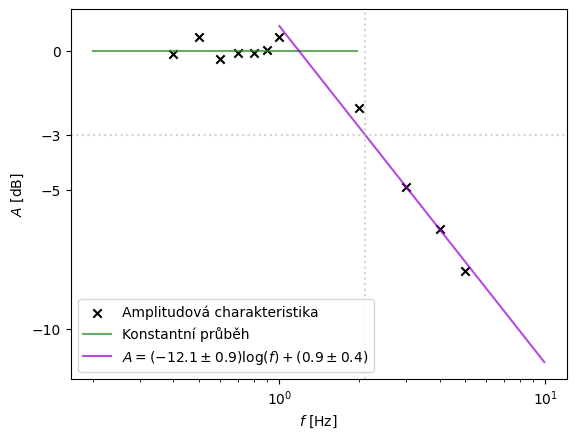

In [24]:
amplitudova_uzavrena = pd.read_excel("rsen_laborka.xlsx", sheet_name="Frekvencni - uzavrena", engine="openpyxl", nrows=12, usecols="A, C", skiprows=[0])

fitovane_parametry_uzavrena_2, kovariance_parametru_uzavrena_2 = optimize.curve_fit(log10_fit, 
                                                                      xdata=amplitudova_uzavrena["frekvence"][6:], 
                                                                      ydata=amplitudova_uzavrena["amplituda [dB]"][6:]+9, 
                                                                      p0 = [-10, 5]) # ocekavane parametry

sigma_parametru_uzavrena_2 = np.sqrt(np.diag(kovariance_parametru_uzavrena_2)) # tohle vypocita presnost, s jakou byly parametry urceny
zaokrouhlene_parametry_uzavrena_2 = []
for j in range(len(fitovane_parametry_uzavrena_2)): # zaokrouhleni na jednu platnou cifru
    zaokrouhlene_parametry_uzavrena_2.append(round_to_reference(fitovane_parametry_uzavrena_2[j], 
                                                         sigma_parametru_uzavrena_2[j]))
print(
    f"amplitudova otevrena: A=({zaokrouhlene_parametry_uzavrena_2[0][0]}\\pm {zaokrouhlene_parametry_uzavrena_2[0][1]})log(f)+({zaokrouhlene_parametry_uzavrena_2[1][0]}\\pm {zaokrouhlene_parametry_uzavrena_2[1][1]})")

x_amplitudova_konst = np.arange(0.2, 2, 0.05)
x_amplitudova_zlom = np.arange(1, 10, 0.1)
fig_amplitudova = plt.figure()
plt.scatter(x=amplitudova_uzavrena["frekvence"], y=amplitudova_uzavrena["amplituda [dB]"]+9,
             marker='x', color="black", # kosmeticke upravy
            label = "Amplitudová charakteristika")
plt.plot(x_amplitudova_konst, log10_fit(x_amplitudova_konst, 0, 0), 
         color = 'forestgreen', alpha = 0.7,
         label = "Konstantní průběh")

plt.plot(x_amplitudova_zlom, log10_fit(x_amplitudova_zlom, fitovane_parametry_uzavrena_2[0], fitovane_parametry_uzavrena_2[1]), 
         color = 'darkviolet', alpha = 0.7, 
         label = "$A=(-12.1\\pm 0.9)\\log(f)+(0.9\\pm 0.4)$")
plt.axhline(y=-3, alpha=0.5, color="darkgray", ls="dotted")
plt.axvline(x=2.1, alpha=0.5, color="darkgray", ls="dotted")
plt.yticks([0, -3, -5, -10])
plt.xscale("log")
plt.legend()
plt.xlabel('$f~\\mathrm{[Hz]}$ ', fontsize = 10)
plt.ylabel("$A~\\mathrm{[dB]}$", fontsize = 10)
plt.savefig("../img/graf_amplitudova_uzavrena.pdf")
plt.show(block=True)